In [1]:
import pandas

In [2]:
fish = pandas.DataFrame({'size': [100, 120, 70],
                         'weight': [20, 30., 25]},
                         index= ['Brown Trout', 'Atlantic Salmon', 'Chinook Salmon'])

In [3]:
fish

,size,weight
Brown Trout,100,20.0
Atlantic Salmon,120,30.0
Chinook Salmon,70,25.0


In [4]:
fish.stack()

Brown Trout      size      100.0
                 weight     20.0
Atlantic Salmon  size      120.0
                 weight     30.0
Chinook Salmon   size       70.0
                 weight     25.0
dtype: float64

In [5]:
type(fish.stack())

pandas.core.series.Series

In [6]:
fish.stack().index

MultiIndex([(    'Brown Trout',   'size'),
            (    'Brown Trout', 'weight'),
            ('Atlantic Salmon',   'size'),
            ('Atlantic Salmon', 'weight'),
            ( 'Chinook Salmon',   'size'),
            ( 'Chinook Salmon', 'weight')],
           )

In [8]:
stacked = fish.stack().reset_index()

In [9]:
stacked

,level_0,level_1,0
0,Brown Trout,size,100.0
1,Brown Trout,weight,20.0
2,Atlantic Salmon,size,120.0
3,Atlantic Salmon,weight,30.0
4,Chinook Salmon,size,70.0
5,Chinook Salmon,weight,25.0


In [11]:
stacked.pivot_table(index='level_0', columns='level_1', values=0)

level_1,size,weight
level_0,,
Atlantic Salmon,120.0,30.0
Brown Trout,100.0,20.0
Chinook Salmon,70.0,25.0


In [12]:
fish.T

,Brown Trout,Atlantic Salmon,Chinook Salmon
size,100.0,120.0,70.0
weight,20.0,30.0,25.0


In [13]:
fish

,size,weight
Brown Trout,100,20.0
Atlantic Salmon,120,30.0
Chinook Salmon,70,25.0


In [14]:
fish['size']['Atlantic Salmon']

120

# Bikes, Again

In [23]:
??pandas.read_csv

Signature:
pandas.read_csv(
    filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal=b'.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_lin

In [16]:
trips = pandas.read_csv('data/201508_trip_data.csv.gz')

In [17]:
trips.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [19]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354152 entries, 0 to 354151
Data columns (total 11 columns):
Trip ID            354152 non-null int64
Duration           354152 non-null int64
Start Date         354152 non-null object
Start Station      354152 non-null object
Start Terminal     354152 non-null int64
End Date           354152 non-null object
End Station        354152 non-null object
End Terminal       354152 non-null int64
Bike #             354152 non-null int64
Subscriber Type    354152 non-null object
Zip Code           353874 non-null object
dtypes: int64(5), object(6)
memory usage: 29.7+ MB


In [21]:
import datetime

In [22]:
def mdy_hm(datetimestring):
    return datetime.datetime.strptime(datetimestring, '%m/%d/%Y %H:%M')
trips['Start Date'] = trips['Start Date'].apply(mdy_hm)

In [24]:
trips['Date'] = trips['Start Date'].apply(lambda x: x.date())

In [28]:
%matplotlib inline

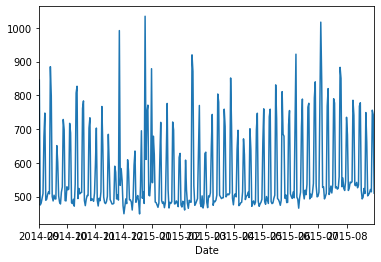

In [30]:
trips.groupby('Date')['Duration'].median().plot()

In [32]:
trips.groupby('Start Station')['Duration'].median().sort_values()

Start Station
Mountain View City Hall             242.0
San Antonio Shopping Center         252.0
Mezes Park                          254.0
Evelyn Park and Ride                264.0
Santa Clara at Almaden              272.0
                                    ...  
San Mateo County Center             780.0
Stanford in Redwood City            827.0
Park at Olive                       977.5
California Ave Caltrain Station    1085.0
University and Emerson             2511.0
Name: Duration, Length: 70, dtype: float64